## Social vulnerability and Covid-19 in Chile

1. Covid-19 in Chile
    1. Covid-19 in Chile and worldwide
    2. Timeline of Covid-19 cases and deaths in Chile 
    3. Which are the 10 most affected districts in Chile (cases) at four different times during the pandemic
    4. Which are the 10 most affected districts in Chile (deaths) at four different times during the pandemic
    
2. The CASEN data

In [41]:
# Read in libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# Read in CASEN data about social vulnerability
casen = pd.read_stata('Casen 2017.dta', convert_categoricals = False)

# Read in data about Covid-19 in Chilen regions
cases_regions = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv',
    parse_dates = True
)

deaths_regions = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo_T.csv',
    parse_dates = True
)

# Read in data about Covid-19 in Chilean districts
cases_districts = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv'
)

deaths_districs = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto38/CasosFallecidosPorComuna.csv'
)

# Read in data about Covid-19 worldwide
csse_cases_all = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
csse_deaths_all = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [2]:
# First look at dataframes

casen.shape, cases.shape, deaths.shape

((216439, 804), (362, 41), (378, 16))

In [5]:
# Select only 49 relevant indicators from the CASEN study, such as poverty, access to health institutions or
# number of persons in household. 

casen_columns = ['region', 'provincia', 'comuna', 'e1', 'e6a', 'o1', 'o12', 'o16', 'o25a_min',
                'o25c', 'o28', 'y21a', 'y22a', 'y24', 'y27a', 'ysub', 'ytot', 's12', 's13', 's14', 
                's26a', 's27a', 's28', 's31a1', 's31a2', 's31a3', 's32c', 's33g1', 's33i1', 's33j1',
                'r1a', 'r1a_cod', 'r3', 'r7c', 'r8a', 'r8b', 'r16a', 'r16b', 'v33', 'v37a', 'v37c',
                'v37i', 'v39b', 'pobreza', 'hh_d_prevs', 'hh_d_cot', 'hh_d_servbas', 'qaut', 'numper']

# print(len(casen_columns))

casen_rel = casen[casen_columns]
# cases.iloc[:, [1, -2]]

In [38]:
def timeline_plot(df, title):
    """
    A function to plot a seaborn diagram which shows the development of Covid-19 data in Chile
    
    Input: 
        df (DataFrame): A transposed DataFrame where the first row (not the index) is the date and the columns are the 
        regions. 
        title (string): Specify the kind of the plot (cases or deaths) 
        
    Output: 
        A seaborn plot. 
    """

    # Transform wide dataframe to long dataframe 
    df_melt = pd.melt(
        df, id_vars = 'Region', 
        value_vars = df.columns.drop('Region'),
        var_name='Regions', 
        value_name='Cases'
    )

    # Apply pandas to datetime and rename column for better understanding
    df_melt['Region'] = pd.to_datetime(df_melt['Region'], format = '%Y-%m-%d')
    df_melt = df_melt.rename(columns = {'Region': 'Date'}).sort_values('Cases', ascending = False)

    # Make a plot 
    
    f, ax = plt.subplots(figsize = (16, 10))
    g = sns.lineplot(
        df_melt.Date, 
        df_melt.Cases, 
        hue = df_melt.Regions
    )

    plt.xlabel('Date', fontsize = 12)
    plt.ylabel('{}'.format(title), fontsize = 12)
    plt.title('Covid-19 {} in Chile'.format(title), fontsize = 12)
    
    plt.tick_params(labelsize=12)
    ax.yaxis.tick_right()
    ax.set_yscale('log')


    plt.grid(False)
    ax.yaxis.grid()
    sns.despine()
    plt.show()
            

## 1. Covid-19 in Chile

###     A. Timeline of Covid-19 cases and deaths in Chile 


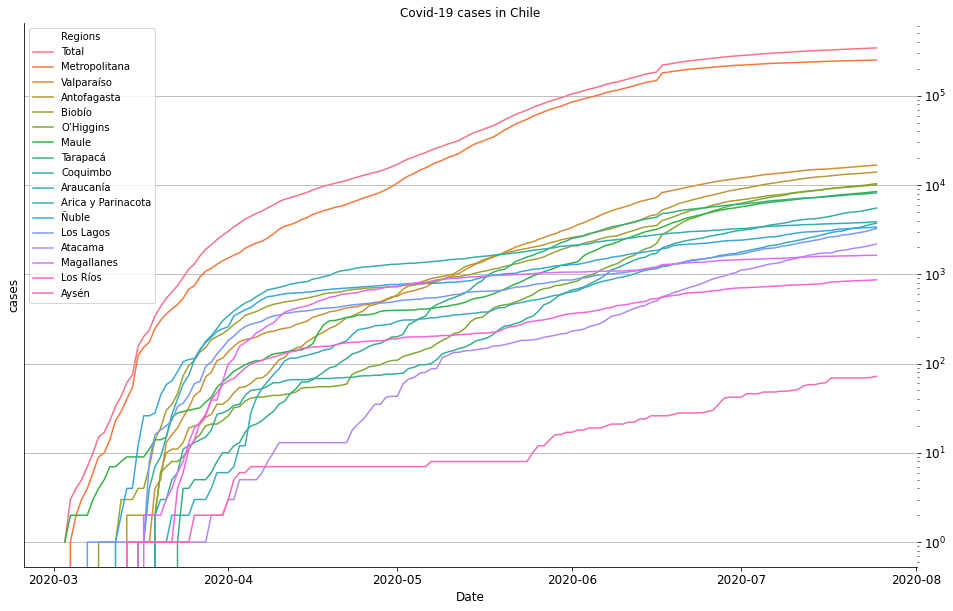

In [39]:
timeline_plot(cases_regions, 'cases')

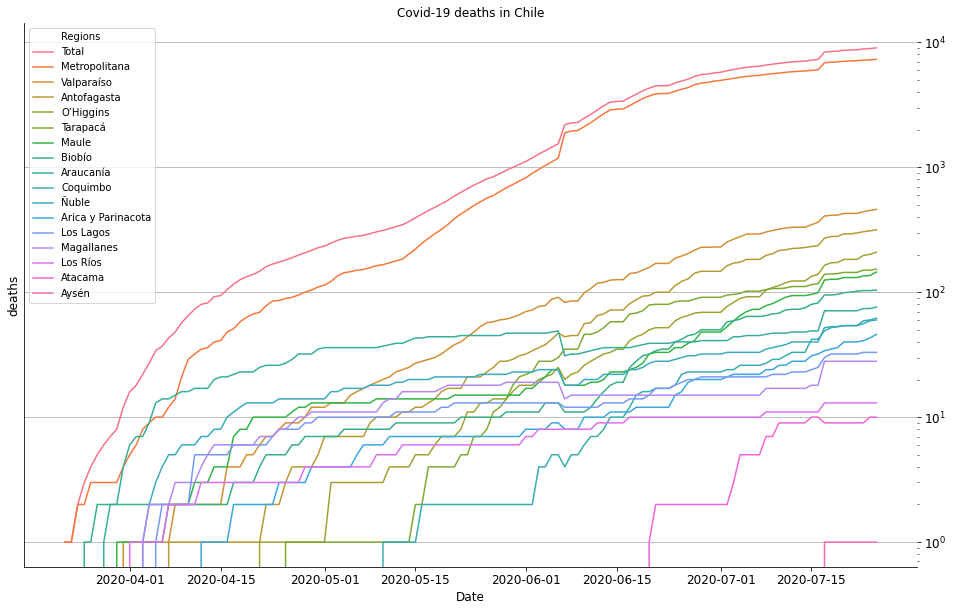

In [40]:
timeline_plot(deaths_regions, 'deaths')

In [79]:
# Make a plot: If 'country' is within m, then show it as red and the rest grey. If not, add it at the end of m. 


def plot_covid_worldwide(df, title, m):
    df_current = df.iloc[:, [1, -1]]
    df_current.columns = ['Country', 'Cases']
    df_current.loc[:, 'per 100.000'] = df_current.loc[:, 'Cases'] / 100000


    df_current = df_current.groupby('Country')['per 100.000'].sum().reset_index().sort_values(['per 100.000'], ascending = False).head(m).reset_index()

    f, ax = plt.subplots(figsize = (16, 10))

    g = sns.barplot(y = df_current['Country'], x = df_current['per 100.000'])
    plt.ylabel('Country', fontsize = 12)
    plt.xlabel('{} per 100.000 habitants'.format(title), fontsize = 12)
    plt.title('Covid-19 {} per 100.000 habitants worldwide'.format(title), fontsize = 12)

    plt.tick_params(labelsize=12)
    ax.yaxis.tick_right()

    plt.grid(False)
    ax.xaxis.grid()
    sns.despine()
    plt.show()

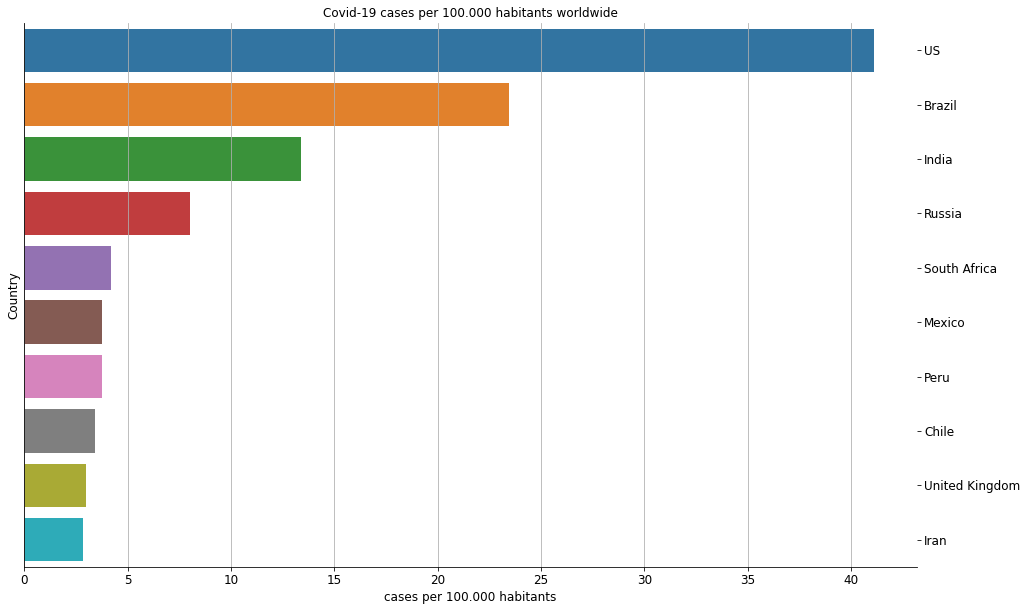

In [80]:
plot_covid_worldwide(csse_cases_all, 'cases', 10)

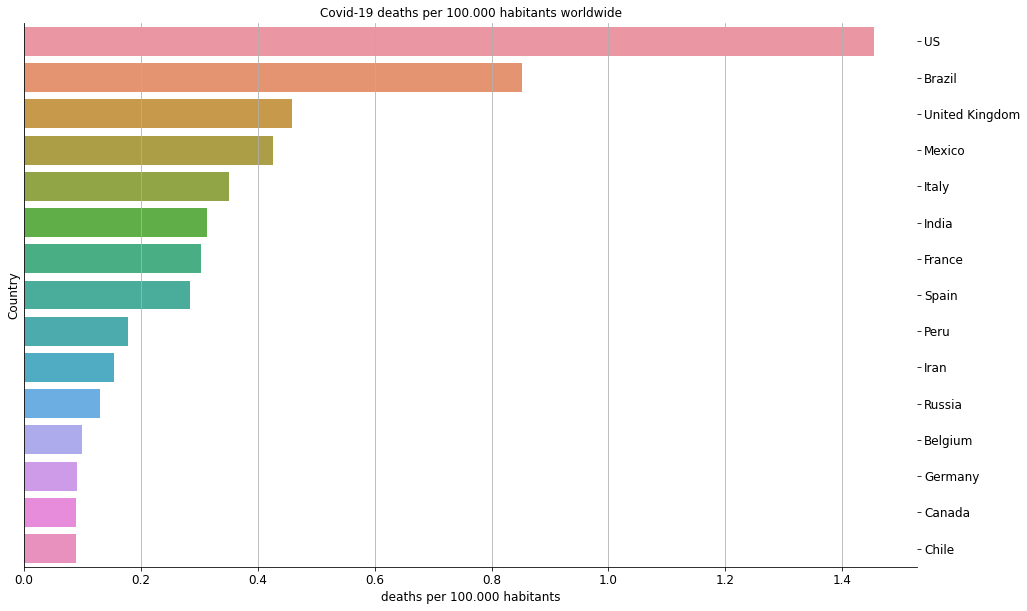

In [81]:
plot_covid_worldwide(csse_deaths_all, 'deaths', 15)

In [4]:
df.groupby('region').hogar.count().reset_index()#.sort_values('hogar', ascending = False)


,region,hogar
0,1,10150
1,2,8510
2,3,6961
3,4,9952
4,5,19625
5,6,15862
6,7,15208
7,8,21532
8,9,15481
9,10,12442


In [18]:
df_e1 = df.loc[:, ['region', 'comuna', 'ytot']]

df_e1.groupby('comuna').ytot.mean().reset_index().sort_values('ytot', ascending = False)

,comuna,ytot
267,13132,1.987719e+06
249,13114,1.618252e+06
258,13123,1.476416e+06
255,13120,1.081854e+06
248,13113,1.002380e+06
...,...,...
198,9208,1.857542e+05
165,8310,1.854193e+05
163,8308,1.828309e+05
119,7203,1.820784e+05
